In [4]:
!pip install google-api-python-client

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 1.7 MB/s eta 0:00:08
    --------------------------------------- 0.3/12.9 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.9 MB 5.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.9 MB 5.3 MB/s eta 0:00:03
   --- ------------------------------------ 1.2/12.9 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/12.9 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/12.9 MB 5.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/12.9 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/12.9 MB 3.3 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/12.9 MB 3.4 MB/s eta 0:00:04
   ------ --------------------------------- 2.0/12.9 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.2/12.9 MB 3.8 MB/s eta 0:00:03
   ---

In [7]:
import pandas as pd
from googleapiclient.discovery import build

# Replace with your own API key
API_KEY = 'API Key'

def get_trending_videos(api_key, max_results=500):
    # Build the YouTube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Initialize the list to hold video details
    videos = []

    # Fetch the most popular videos
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode='IN',
        maxResults=50
    )

    # Paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': item['snippet']['categoryId'],
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': item['statistics'].get('viewCount', 0),
                'like_count': item['statistics'].get('likeCount', 0),
                'dislike_count': item['statistics'].get('dislikeCount', 0),
                'favorite_count': item['statistics'].get('favoriteCount', 0),
                'comment_count': item['statistics'].get('commentCount', 0)
            }
            videos.append(video_details)

        # Get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def main():
    trending_videos = get_trending_videos(API_KEY)
    filename = 'trending_videos.csv'
    save_to_csv(trending_videos, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()


Trending videos saved to trending_videos.csv


In [8]:
df = pd.read_csv("trending_videos.csv")
df

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,7ru18HS_934,The Devil - Official Teaser (HDR) | Challengin...,"For more latest songs & videos, subscribe 👉 ht...",2025-02-16T05:32:07Z,UCKFnbjBQDzzh002TMJcyuZA,Saregama Kannada,1,"['devil', 'devil teaser', 'devil kannada tease...",PT1M4S,hd,False,3123434,231818,0,0,19199
1,_t-t8mG_vUY,Madharasi | Title Glimpse | Sivakarthikeyan | ...,Junglee Music Tamil presents Title Glimpse of ...,2025-02-17T05:30:13Z,UCXS0LXj5BO9CS8uVBFPBvrg,Junglee Music Tamil,10,"['SK X ARM', 'Sivakarthikeyan', 'Sk arm', 'Sk ...",PT45S,hd,False,6412647,86872,0,0,2132
2,ivkNbh8YyUo,Every Indian Horror Movie & shows | Ft. @Slayy...,Download the POP app now: https://dl.popclub.c...,2025-02-15T08:30:33Z,UCKnNrlSJF_hWoBSz1lY_D7g,NOT YOUR TYPE,22,"['Indian schools', 'Indian Exams', 'Board Exam...",PT10M30S,hd,False,4418067,406560,0,0,17749
3,qTXxsV-XjQM,"Veera(வீரா) | திங்கள்-வெள்ளி, இரவு 7 மணிக்கு |...",#Veera #Maaran #Kanmani #Ramachandran #Valli #...,2025-02-16T04:17:18Z,UC_wIGmvdyAQLtl-U2nHV9rg,Zee Tamil,24,"['Veera', 'New Fiction', 'New Serial', 'Fictio...",PT30S,hd,False,1305274,32205,0,0,374
4,sicIT7MWI-E,First Look | Kartik Aaryan | Sreeleela | Anura...,The Heartbeat of Love Just Got a Melody! ❤️🎶 T...,2025-02-15T13:15:02Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,"['bollywood movies 2025', 'tseries', 'tseries ...",PT1M1S,hd,False,8686842,375485,0,0,34484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-RZMtV6hhgY,Grand Delivery Of India's First Electric Gwagon 😍,Grand delivery of my gwagon\n\nAstroji: https:...,2025-02-11T13:30:00Z,UCbmu9wfzxKls40WkCzvqtRA,Elvish yadav,25,"['Gwagon', 'Gwagon electric', 'G580', 'Elvish ...",PT11M56S,hd,False,3630072,292901,0,0,15172
114,iZBfcut5I48,DIAMOND FINAL REVISION CLASS 10TH ENGLISH | EV...,DIAMOND FINAL REVISION CLASS 10TH ENGLISH | EV...,2025-02-14T10:59:40Z,UC9dyrsYEmD4iGJ8Oz1G5dpw,Dear Sir,27,"['Class 10 English revision', 'CBSE Class 10 E...",PT2H11M41S,hd,False,1847623,198020,0,0,12100
115,Apj9ISyXr_s,Full Video: Godari Gattu - Sankranthiki Vasthu...,Get ready for a charter buster song from #Sank...,2025-02-09T05:29:07Z,UCnJjcn5FrgrOEp5_N45ZLEQ,T-Series Telugu,10,"['Telugu New song', 'Telugu Songs', 'Telugu Hi...",PT3M53S,hd,False,14474523,66275,0,0,1031
116,sFKz-qWhwlo,Medical Dreams - E03 - Medical vs Engineering ...,Doctor banna hai toh Physics kyun padhna padeg...,2025-02-14T13:14:48Z,UCdxbhKxr8pyWTx1ExCSmJRw,Girliyapa,24,[],PT36M44S,hd,True,458230,15425,0,0,1155


In [9]:
df.isnull().sum()

video_id          0
title             0
description       1
published_at      0
channel_id        0
channel_title     0
category_id       0
tags              0
duration          0
definition        0
caption           0
view_count        0
like_count        0
dislike_count     0
favorite_count    0
comment_count     0
dtype: int64

In [10]:
df['description'].fillna('No description', inplace=True)

In [11]:
df.dtypes

video_id          object
title             object
description       object
published_at      object
channel_id        object
channel_title     object
category_id        int64
tags              object
duration          object
definition        object
caption             bool
view_count         int64
like_count         int64
dislike_count      int64
favorite_count     int64
comment_count      int64
dtype: object

In [12]:
df['published_at'] = pd.to_datetime(df['published_at'])

In [13]:
df['tags'] = df['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df.head(5)

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,7ru18HS_934,The Devil - Official Teaser (HDR) | Challengin...,"For more latest songs & videos, subscribe 👉 ht...",2025-02-16 05:32:07+00:00,UCKFnbjBQDzzh002TMJcyuZA,Saregama Kannada,1,"[devil, devil teaser, devil kannada teaser, de...",PT1M4S,hd,False,3123434,231818,0,0,19199
1,_t-t8mG_vUY,Madharasi | Title Glimpse | Sivakarthikeyan | ...,Junglee Music Tamil presents Title Glimpse of ...,2025-02-17 05:30:13+00:00,UCXS0LXj5BO9CS8uVBFPBvrg,Junglee Music Tamil,10,"[SK X ARM, Sivakarthikeyan, Sk arm, Sk arm tea...",PT45S,hd,False,6412647,86872,0,0,2132
2,ivkNbh8YyUo,Every Indian Horror Movie & shows | Ft. @Slayy...,Download the POP app now: https://dl.popclub.c...,2025-02-15 08:30:33+00:00,UCKnNrlSJF_hWoBSz1lY_D7g,NOT YOUR TYPE,22,"[Indian schools, Indian Exams, Board Exams, Ho...",PT10M30S,hd,False,4418067,406560,0,0,17749
3,qTXxsV-XjQM,"Veera(வீரா) | திங்கள்-வெள்ளி, இரவு 7 மணிக்கு |...",#Veera #Maaran #Kanmani #Ramachandran #Valli #...,2025-02-16 04:17:18+00:00,UC_wIGmvdyAQLtl-U2nHV9rg,Zee Tamil,24,"[Veera, New Fiction, New Serial, Fiction, ஜீ த...",PT30S,hd,False,1305274,32205,0,0,374
4,sicIT7MWI-E,First Look | Kartik Aaryan | Sreeleela | Anura...,The Heartbeat of Love Just Got a Melody! ❤️🎶 T...,2025-02-15 13:15:02+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,"[bollywood movies 2025, tseries, tseries songs...",PT1M1S,hd,False,8686842,375485,0,0,34484


In [14]:
df[['view_count', 'like_count', 'dislike_count', 'comment_count']].describe()


,view_count,like_count,dislike_count,comment_count
count,1.180000e+02,118.000000,118.0,118.000000
mean,2.478588e+06,76161.169492,0.0,3375.279661
std,3.643085e+06,99513.650564,0.0,5638.586278
min,6.830200e+04,1398.000000,0.0,21.000000
25%,3.127002e+05,9329.500000,0.0,341.500000
50%,9.853890e+05,32294.500000,0.0,1185.500000
75%,2.877490e+06,86420.000000,0.0,3966.500000
max,1.497673e+07,406560.000000,0.0,35248.000000


C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


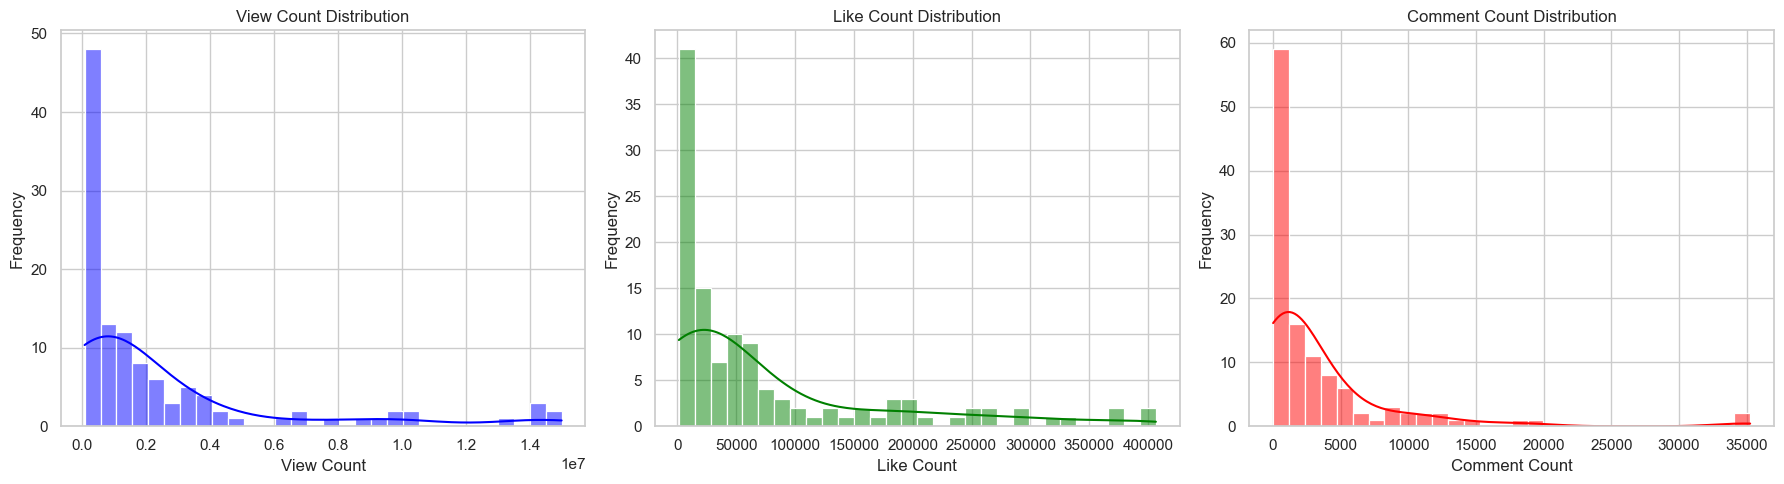

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(df['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(df['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(df['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The view count, like count and comment counts graphs are all right skewed graphs, which means only a handful of trending videos get views, likes and comments.

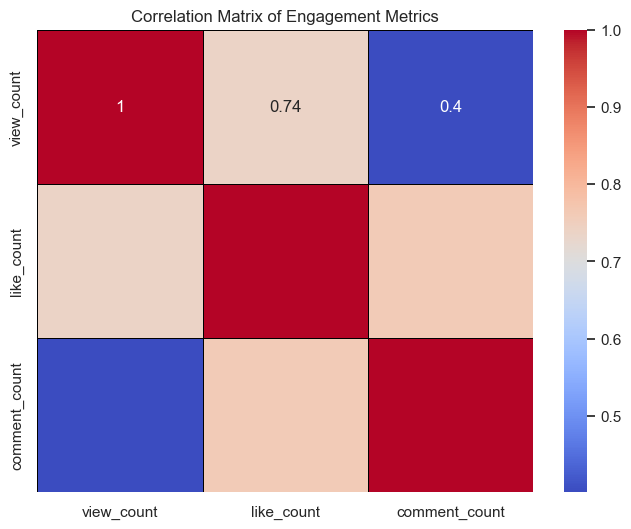

In [16]:
correlation_matrix = df[['view_count', 'like_count', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

There is a strong positive correlation between view count and like count. This means that videos with higher view counts tend to receive more likes. It suggests that as the number of viewers increases, the likelihood of receiving likes also increases.

There is a moderate positive correlation between view count and comment count. This indicates that videos with higher view counts are somewhat likely to receive more comments.

There is a strong positive correlation between like count and comment count. This suggests that videos with more likes also tend to receive more comments. Viewers who like a video are often engaged enough to leave comments as well.

In [18]:
from googleapiclient.discovery import build

API_KEY = 'API Key'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='IN'
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


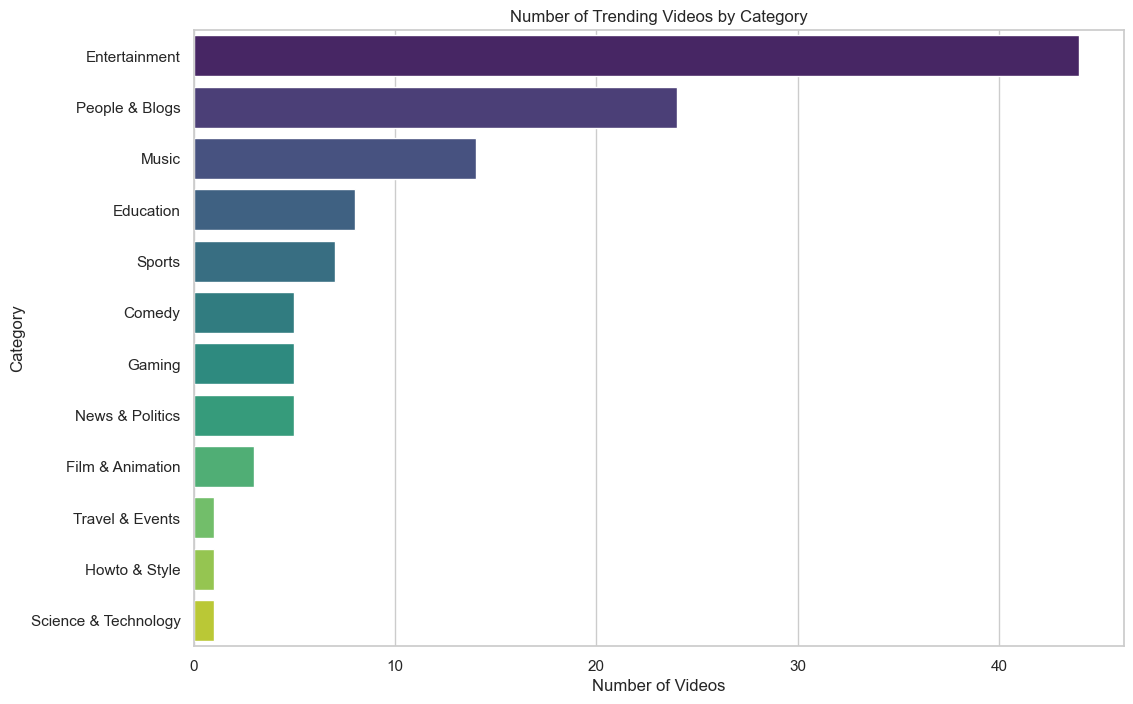

In [20]:
df['category_name'] = df['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=df['category_name'], order=df['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

The bar chart shows that the Entertainment, People & Blogs, and Music categories have the highest number of trending videos.

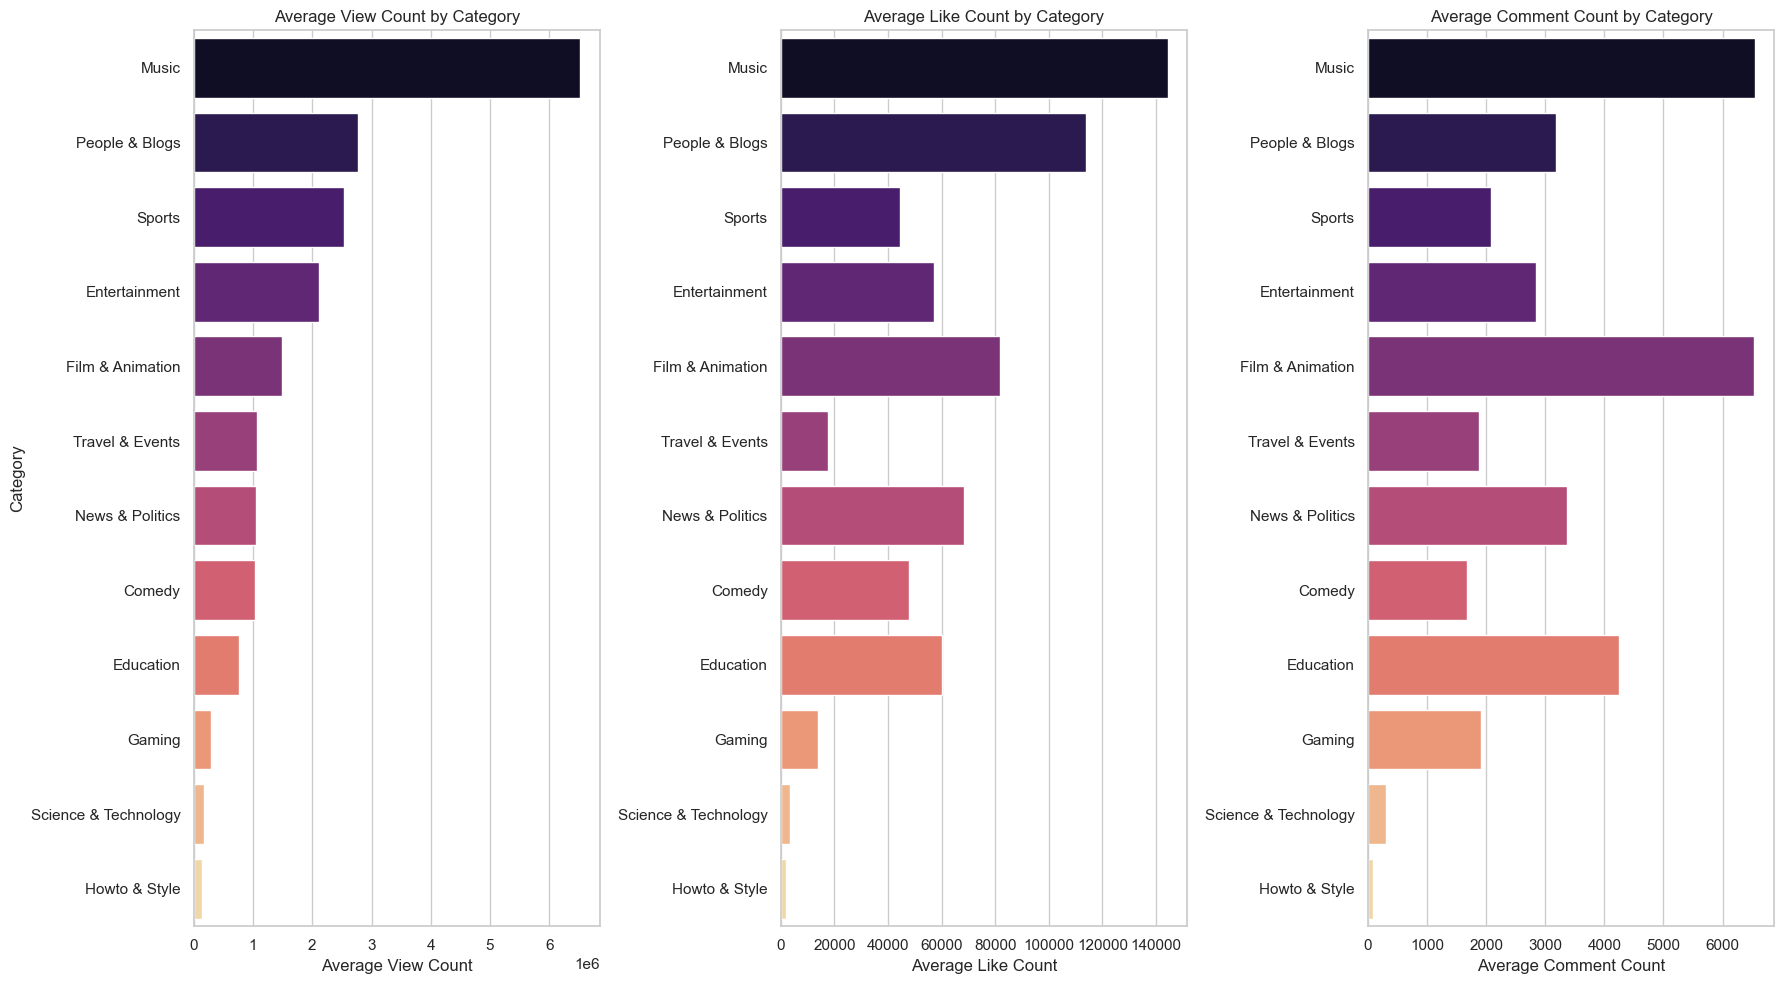

In [22]:
category_engagement = df.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

The Music cateogry rules in all the three graphs, while the likes and comments in this category can be disputed owing to the fact that content-owners employ paid bots and fan-armies with the sole intention of hacking the algorithm into thinking it's a trending video but due to the insufficient nature of the data we cannot say it conclusively. Same can be said about Entertainment, People & Blogs and Sports as those categories are also fan-army prone data.

Education has abnormally high likes and comments w.r.t. views.

In [23]:
!pip install isodate
import isodate

# convert ISO 8601 duration to seconds
df['duration_seconds'] = df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

df['duration_range'] = pd.cut(df['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

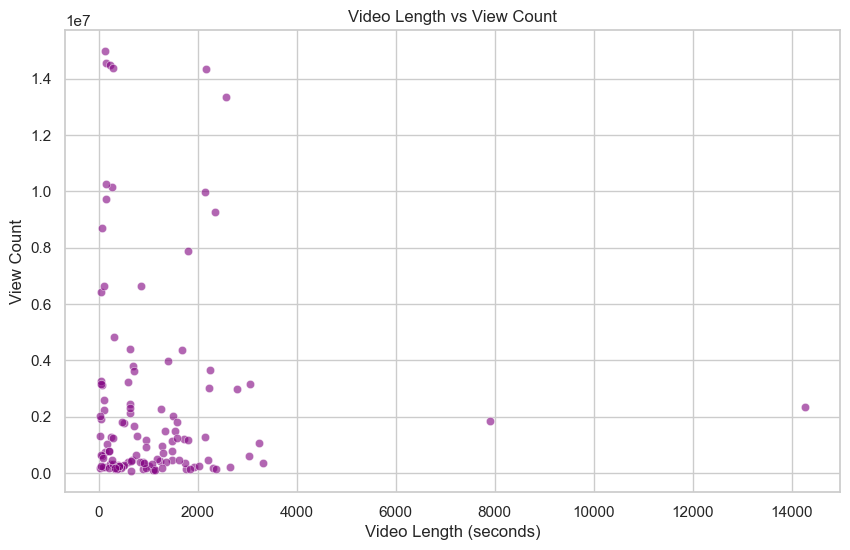

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=df, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


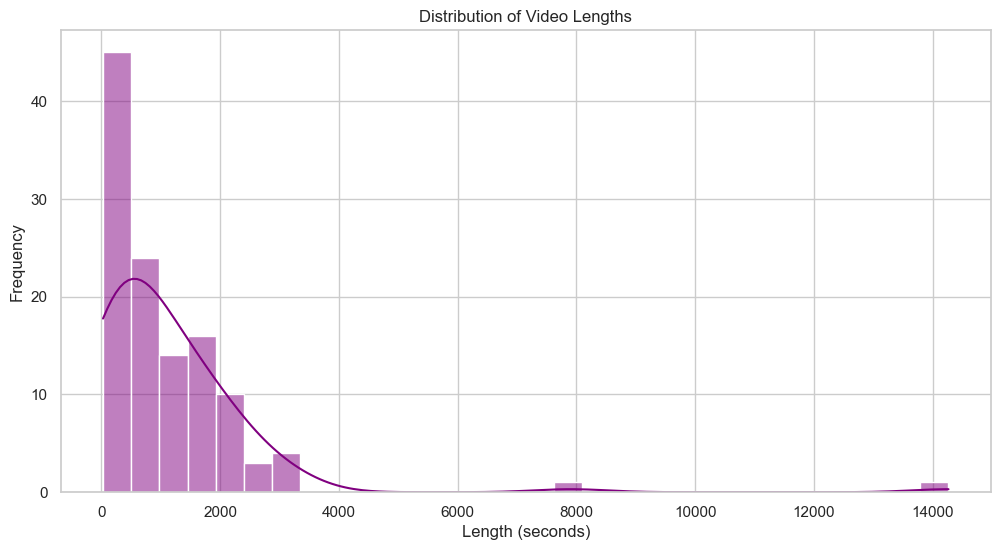

NameError: name 'stats' is not defined

<Figure size 1200x600 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_seconds'], bins=30, kde=True, color='purple')
plt.title('Distribution of Video Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(df['duration_seconds'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Video Lengths')
plt.show()


C:\Users\viven\AppData\Local\Temp\ipykernel_14984\1202654223.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_engagement = df.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\viven\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

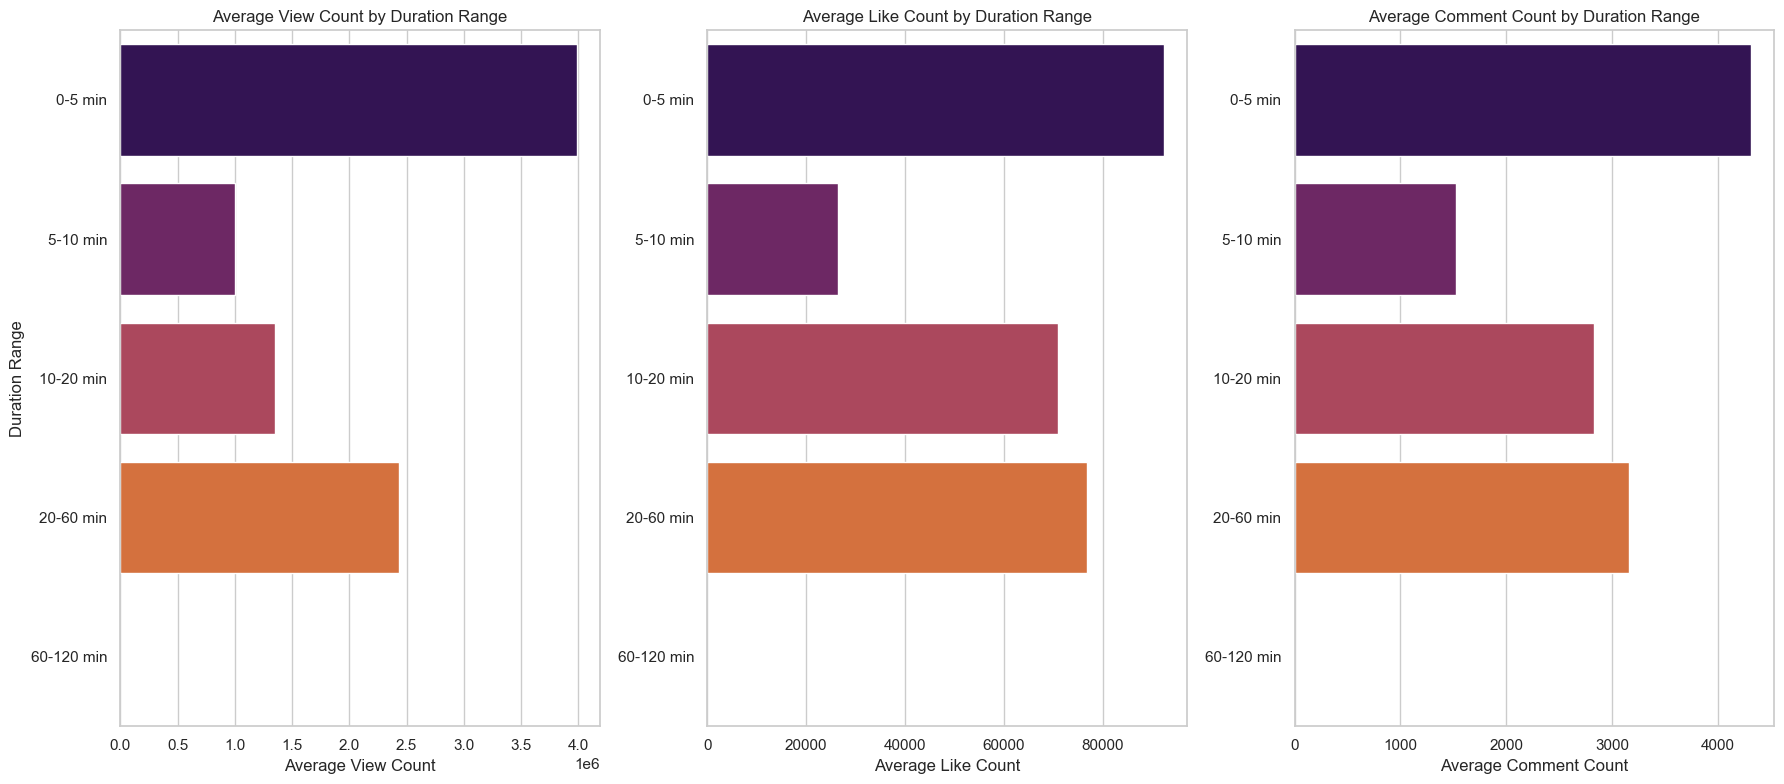

In [26]:
# bar chart for engagement metrics by duration range
length_engagement = df.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='inferno')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='inferno')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='inferno')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

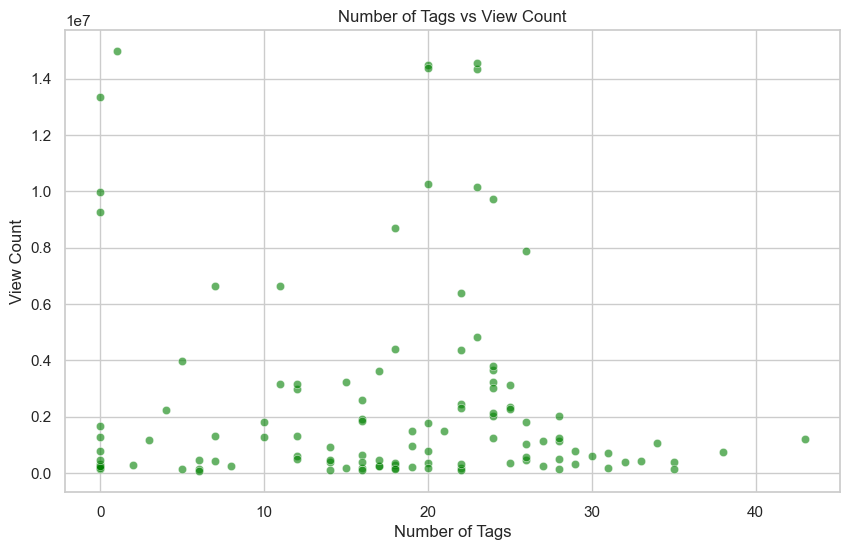

In [30]:
# calculate the number of tags for each video
df['tag_count'] = df['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=df, alpha=0.6, color='green')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

The scatter plot shows a strong relationship between the number of tags and view count, suggesting that the number of tags has a substantial impact on a video’s view count.

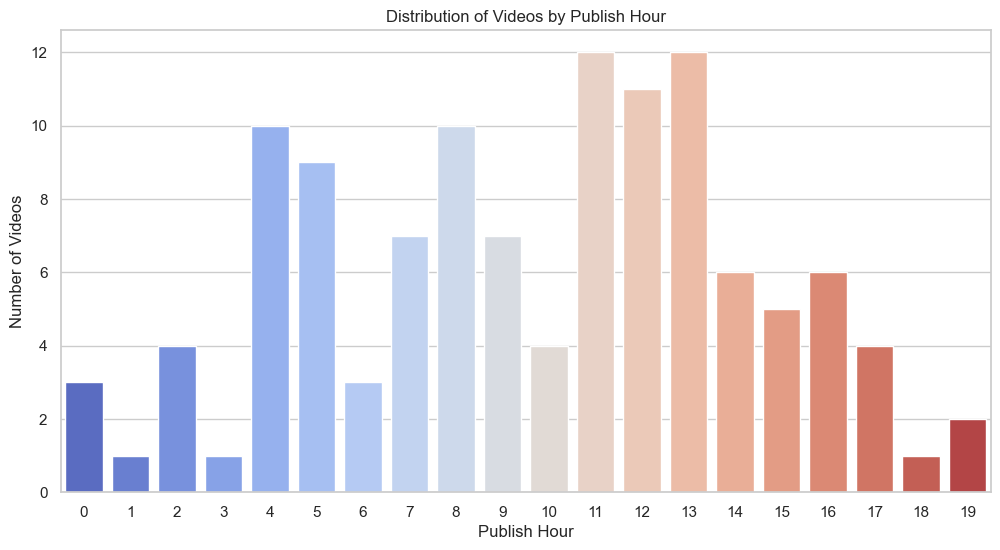

In [32]:
# extract hour of publication
df['publish_hour'] = df['published_at'].dt.hour

# bar chart for publish hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='publish_hour', data=df, palette='coolwarm')
plt.title('Distribution of Videos by Publish Hour')
plt.xlabel('Publish Hour')
plt.ylabel('Number of Videos')
plt.show()

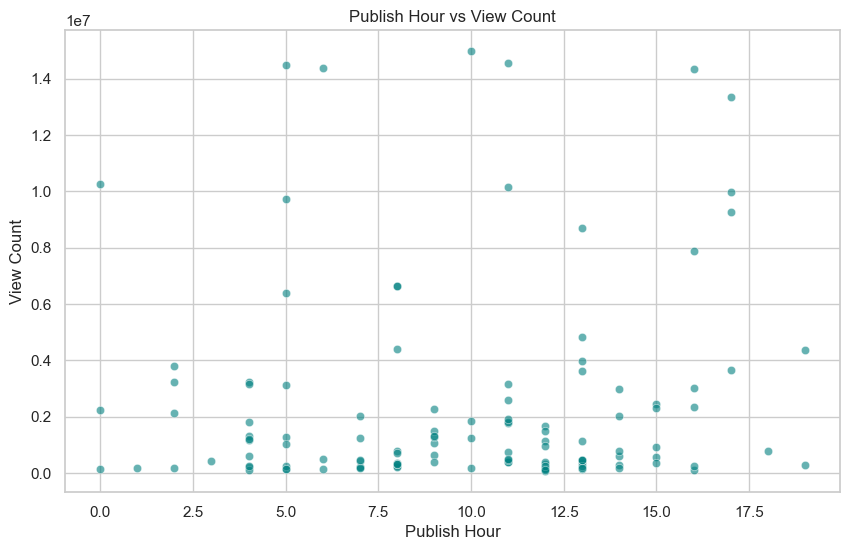

In [33]:
# scatter plot for publish hour vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='publish_hour', y='view_count', data=df, alpha=0.6, color='teal')
plt.title('Publish Hour vs View Count')
plt.xlabel('Publish Hour')
plt.ylabel('View Count')
plt.show()